<a href="https://colab.research.google.com/github/m-hossni/Tensorflow-and-Keras-INFO-6146-F24/blob/main/project%20files/Jack_FNN_TF_Keras_PROJECT24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FNN (Feedforward Neural Networks)**

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28 * 28))  # Flatten the 28x28 images into 784-dimensional vectors
x_test = x_test.reshape((x_test.shape[0], 28 * 28))  # Flatten test images

x_train = x_train.astype('float32') / 255  # Normalize pixel values to [0, 1]
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [2]:
# Build a Feedforward Neural Network model
model = models.Sequential()

# Input layer (784 inputs, corresponding to flattened 28x28 images)
model.add(layers.Input(shape=(28 * 28,)))

# First fully connected (Dense) hidden layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Second fully connected (Dense) hidden layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (one for each clothing category) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7285 - loss: 0.8037 - val_accuracy: 0.8447 - val_loss: 0.4366
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8557 - loss: 0.4109 - val_accuracy: 0.8586 - val_loss: 0.4054
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8674 - loss: 0.3684 - val_accuracy: 0.8701 - val_loss: 0.3587
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8776 - loss: 0.3340 - val_accuracy: 0.8730 - val_loss: 0.3551
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8852 - loss: 0.3135 - val_accuracy: 0.8802 - val_loss: 0.3271
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8915 - loss: 0.2954 - val_accuracy: 0.8742 - val_loss: 0.3545
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8954 - loss: 0.2816 - val_accuracy: 0.8866 - val_loss: 0.3189
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9020 - loss: 0.2668 - val_accuracy: 0.

In [4]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8795 - loss: 0.3408
Test accuracy: 87.97%


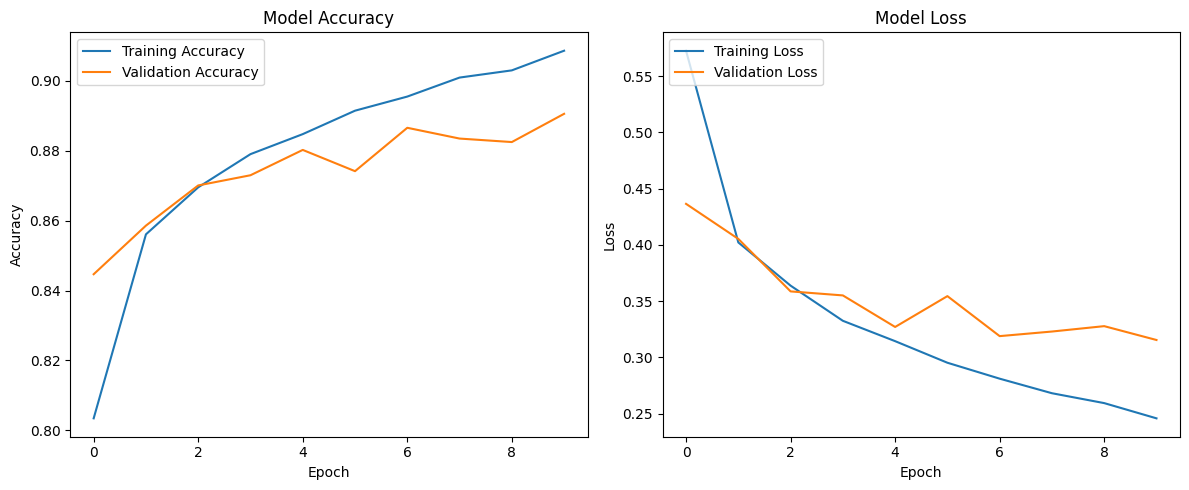

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


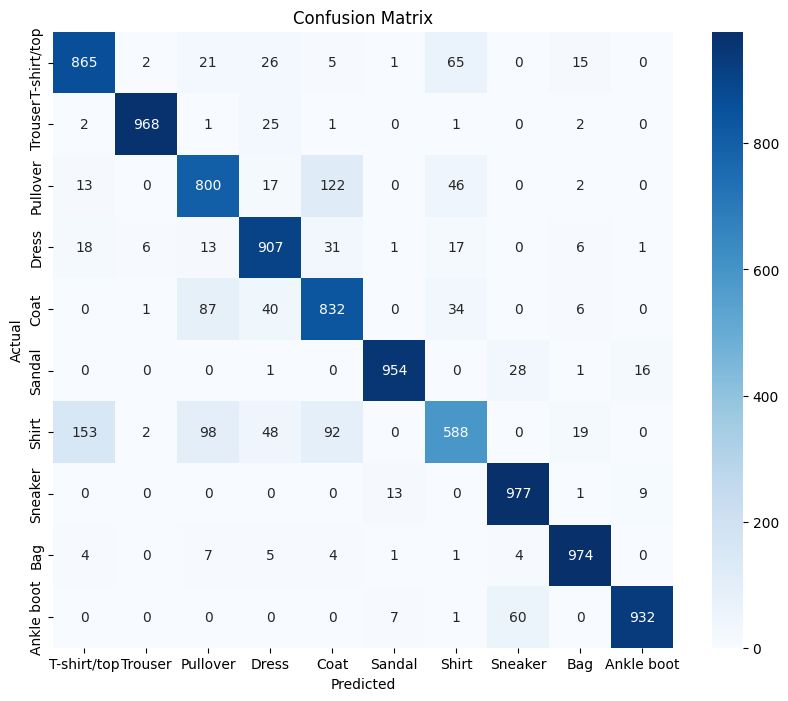

In [9]:
# Predict classes for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
            yticklabels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

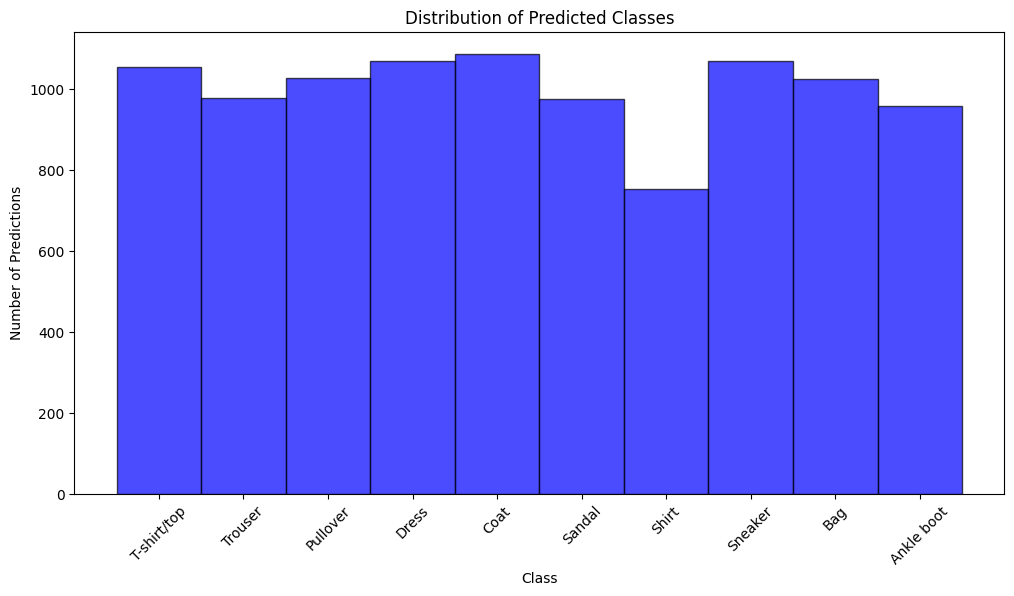

In [13]:
# Define the label names corresponding to Fashion-MNIST classes
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12, 6))
plt.hist(y_pred_classes, bins=np.arange(11) - 0.5, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.xticks(np.arange(10), label_names, rotation=45)
plt.show()

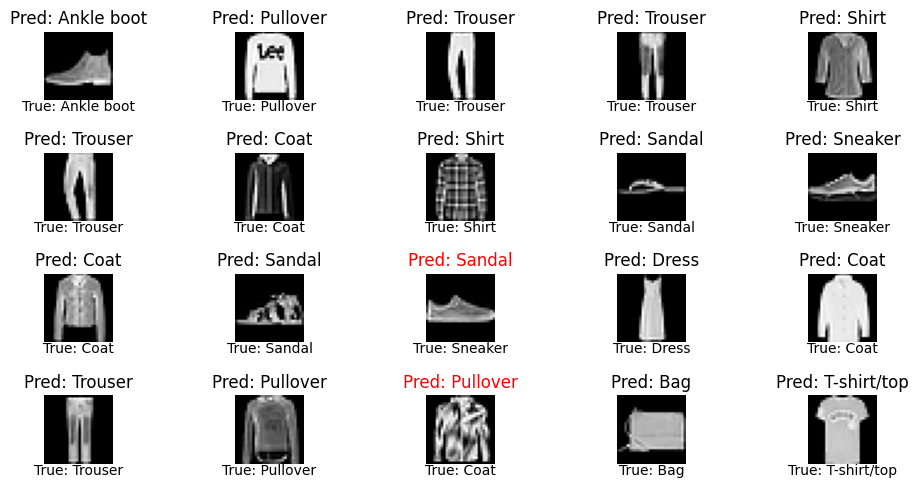

In [16]:
# Display a few predictions
plt.figure(figsize=(10, 5))
for i in range(20):  # Display 20 images
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # Get the predicted and true labels
    pred_label = label_names[y_pred_classes[i]]
    true_label = label_names[y_true[i]]

    # Set the title to show label names
    if pred_label != true_label:
        plt.title(f"Pred: {pred_label}", color='red')
    else:
        plt.title(f"Pred: {pred_label}", color='black')

    # Display the true label below the predicted label in black
    plt.text(0.5, -0.15, f"True: {true_label}", color='black', ha='center',
             transform=plt.gca().transAxes)  # Place the true label below the predicted label

    plt.axis('off')

plt.tight_layout()
plt.show()